In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [35]:
class Perceptron(nn.Module):
    def __init__(self, input_features):
        super().__init__()
    
        self.weights = nn.Parameter(torch.zeros(input_features))
        self.bias = nn.Parameter(torch.randn(1))

    
    def forward(self, x: torch.tensor) -> torch.tensor:
        x = x.float() #ensure x is float tensor
        linear_output = torch.matmul(x, self.weights) + self.bias
        prediction = (linear_output > 0).float()
        return prediction

In [36]:
X_train = torch.tensor([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
], dtype=torch.float32)

y_train = torch.tensor([0.0, 0.0, 0.0, 1.0], dtype=torch.float32)

In [37]:
input_features = X_train.shape[1]
input_features

2

In [38]:
perceptron_model = Perceptron(input_features = input_features)

In [39]:
print(f"Initial Weights: {perceptron_model.weights.data.numpy()}")
print(f"Initial Bias: {perceptron_model.bias.data.numpy()}")

Initial Weights: [0. 0.]
Initial Bias: [0.62102705]


In [40]:
with torch.no_grad():
    initial_predictions = perceptron_model(X_train)
    print(f"Inputs:\n{X_train}")
    print(f"Target Labels:\n{y_train}")
    print(f"Initial Predictions:\n{initial_predictions}")

Inputs:
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
Target Labels:
tensor([0., 0., 0., 1.])
Initial Predictions:
tensor([1., 1., 1., 1.])


In [41]:
learning_rate = 0.1
epochs = 100
for epoch in range(epochs):

    predictions = perceptron_model(X_train).squeeze()

    errors = y_train - predictions

    with torch.no_grad(): 
        for i in range(len(X_train)):
            if errors[i] != 0: 
                perceptron_model.weights.data += learning_rate * errors[i] * X_train[i]
                perceptron_model.bias.data += learning_rate * errors[i]


    if (epoch + 1) % 10 == 0 or epoch == 0:
        accuracy = (predictions == y_train).float().mean().item()
        print(f"Epoch {epoch+1}/{epochs}, Accuracy: {accuracy:.2f}")
        if accuracy == 1.0:
            print("Perceptron learned the data!")
            break

Epoch 1/100, Accuracy: 0.25
Epoch 10/100, Accuracy: 1.00
Perceptron learned the data!


In [42]:
with torch.no_grad():
    final_predictions = perceptron_model(X_train).squeeze()
    print(f"Inputs:\n{X_train}")
    print(f"Target Labels:\n{y_train}")
    print(f"Final Predictions:\n{final_predictions}")

print("\n--- Final Perceptron Parameters ---")
print(f"Final Weights: {perceptron_model.weights.data.numpy()}")

Inputs:
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
Target Labels:
tensor([0., 0., 0., 1.])
Final Predictions:
tensor([0., 0., 0., 1.])

--- Final Perceptron Parameters ---
Final Weights: [0.1 0.1]


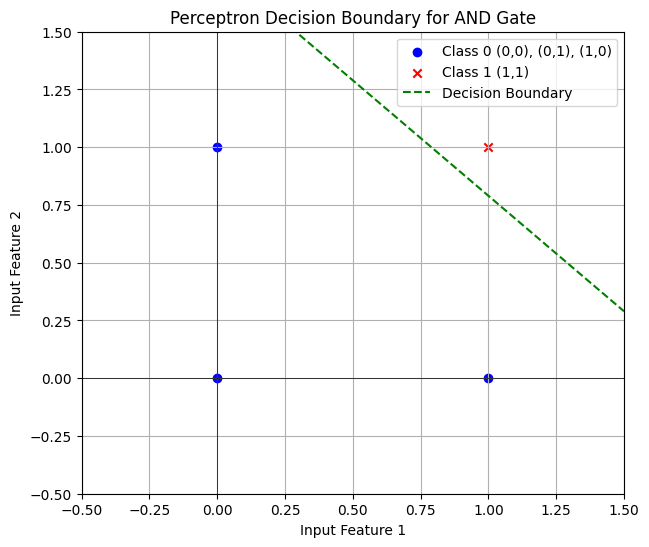

In [43]:
import matplotlib.pyplot as plt
if input_features == 2:
    plt.figure(figsize=(7, 6))

    # Plot data points
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', marker='o', label='Class 0 (0,0), (0,1), (1,0)')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', marker='x', label='Class 1 (1,1)')

    w1, w2 = perceptron_model.weights.data.numpy()
    b = perceptron_model.bias.data.numpy()[0]


    if np.abs(w2) > 1e-6:
        x_plot = np.linspace(-0.5, 1.5, 100) 
        y_plot = (-w1 * x_plot - b) / w2
        plt.plot(x_plot, y_plot, color='green', linestyle='--', label='Decision Boundary')
    elif np.abs(w1) > 1e-6: 
        plt.axvline(x=-b/w1, color='green', linestyle='--', label='Decision Boundary')
    else: 
        print("Weights are zero, no clear decision boundary.")


    plt.title('Perceptron Decision Boundary for AND Gate')
    plt.xlabel('Input Feature 1')
    plt.ylabel('Input Feature 2')
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()
    plt.show()
